In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
##from statsmodel.graphics.gofplots import qqplot
from scipy.stats import zscore

In [3]:
df=pd.read_csv("E:\\database_IND.csv")
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


loading dataset

In [269]:
df.shape

(908, 25)

In [270]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The features 'capacity_mw','latitude','longitude','other_fuel3','commissioning_year','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','estimated_generation_gwh' are float type remaing all are object type        
        


In [271]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

This dataset has 908 rows and 25 coloumns

In [272]:
df['country'].unique()

array(['IND'], dtype=object)

In [273]:
df['country_long'].unique()

array(['India'], dtype=object)

both the features country and country long has single value so I'm going to drop it.

In [274]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

the features latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,geolocation_source,wepp_id,'year_of_capacity_data','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_data_source','estimated_generation_gwh' has null values

<AxesSubplot:ylabel='primary_fuel'>

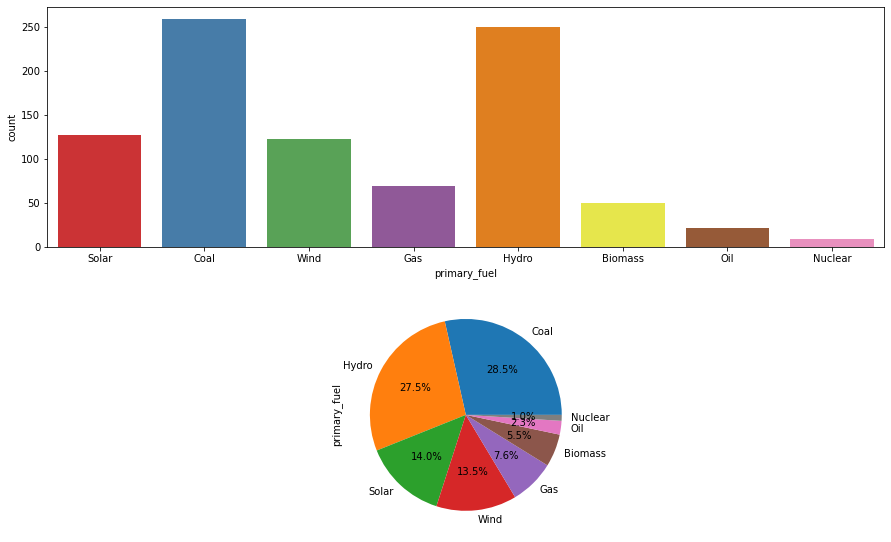

In [108]:
plt.figure(figsize=(15,15))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.primary_fuel,palette="Set1")

i += 1
plt.subplot(rows,cols,i)
df_new['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

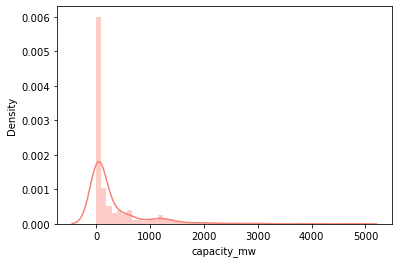

In [110]:
sns.distplot(df.capacity_mw,color="salmon")

__Handling missing values in float data type

In [4]:
df_new=df

<AxesSubplot:xlabel='latitude', ylabel='Density'>

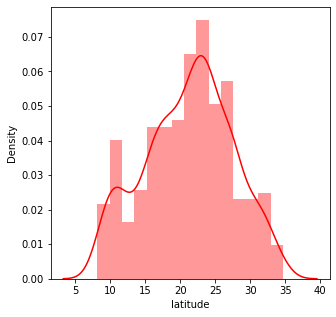

In [5]:
plt.figure(figsize=(5,5))
sns.distplot(df.latitude,color="red",kde=True)

latitude feature has no normal curve so I'm applying median to fill the values

In [6]:
df_new['latitude'].fillna((df_new['latitude'].median()), inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='Density'>

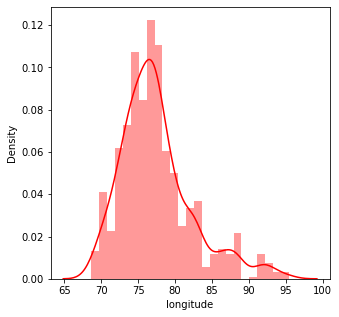

In [7]:
plt.figure(figsize=(5,5))
sns.distplot(df.longitude,color="red",kde=True)

longitude feature has  normal curve so I'm applying mean to fill the values

In [8]:
df_new['longitude'].fillna((df_new['latitude'].mean()), inplace=True)

<AxesSubplot:xlabel='other_fuel3'>

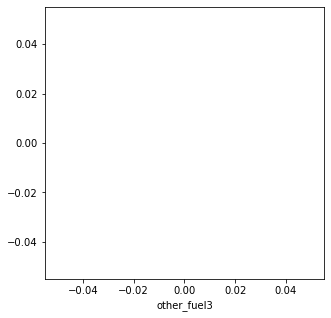

In [9]:
plt.figure(figsize=(5,5))
sns.distplot(df.other_fuel3,color="red",kde=True)

In [10]:
df['other_fuel3'].unique()

array([nan])

the feature other fuel 3 has only nan values so I'm going to drop this

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

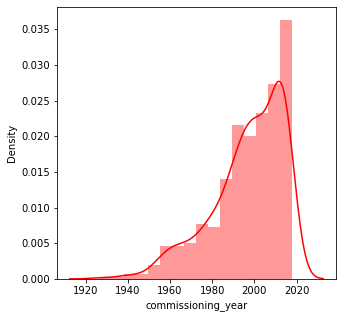

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(df.commissioning_year,color="red",kde=True)

commissioning_year is not distributed normally so I'm using median

In [12]:
df_new['commissioning_year'].fillna((df_new['commissioning_year'].median()), inplace=True)

<AxesSubplot:xlabel='wepp_id'>

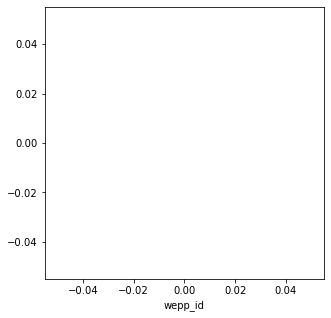

In [13]:
plt.figure(figsize=(5,5))
sns.distplot(df.wepp_id,color="red",kde=True)

In [14]:
df['wepp_id'].unique()

array([nan])

the feature wepp_id has only nan values so I'm going to drop this 

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

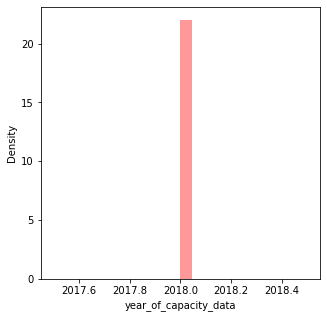

In [15]:
plt.figure(figsize=(5,5))
sns.distplot(df.year_of_capacity_data,color="red",kde=True)

In [16]:
df['year_of_capacity_data'].unique()

array([  nan, 2018.])

the year_of_capacity_data feature has only one value so we are not able to predict the target value by this feature so I,m going to drop it

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

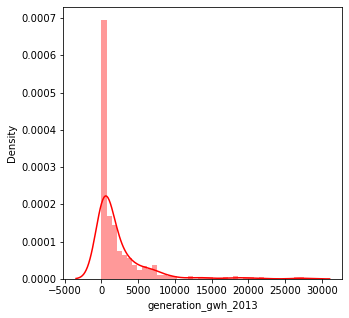

In [17]:
plt.figure(figsize=(5,5))
sns.distplot(df.generation_gwh_2013,color="red",kde=True)

the feature generation_gwh_2013 is not forming normal curve so I'm using median

In [18]:
df_new['generation_gwh_2013'].fillna((df_new['generation_gwh_2013'].median()), inplace=True)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

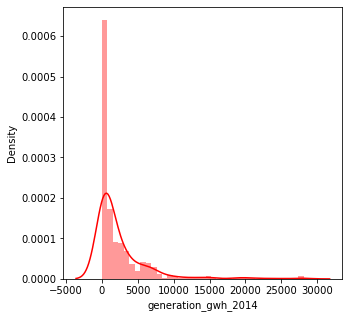

In [19]:
plt.figure(figsize=(5,5))
sns.distplot(df.generation_gwh_2014,color="red",kde=True)

the feature generation_gwh_2014 is not forming normal curve and it has negative values so I'm using median 

In [20]:
df_new['generation_gwh_2014'].fillna((df_new['generation_gwh_2014'].median()), inplace=True)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

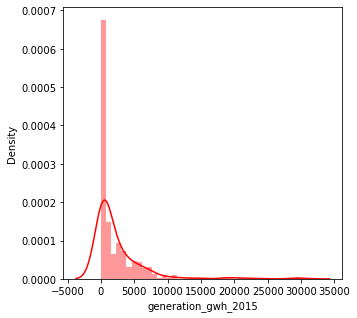

In [21]:
plt.figure(figsize=(5,5))
sns.distplot(df.generation_gwh_2015,color="red",kde=True)

the feature generation_gwh_2015 is not forming normal curve and it has negative values so I'm using median 

In [22]:
df_new['generation_gwh_2015'].fillna((df_new['generation_gwh_2015'].median()), inplace=True)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

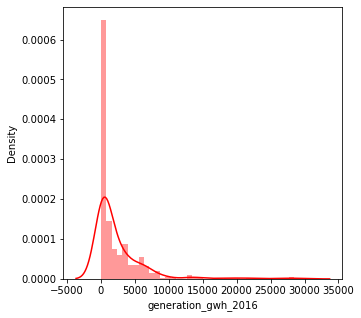

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(df.generation_gwh_2016,color="red",kde=True)

the feature generation_gwh_2016 is not forming normal curve and it has negative values so I'm using median 

In [24]:
df_new['generation_gwh_2016'].fillna((df_new['generation_gwh_2016'].median()), inplace=True)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

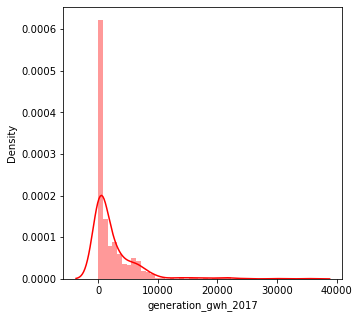

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(df.generation_gwh_2017,color="red",kde=True)

the feature generation_gwh_2017 is not forming normal curve and it has negative values so I'm using median 

In [26]:
df_new['generation_gwh_2017'].fillna((df_new['generation_gwh_2017'].median()), inplace=True)

<AxesSubplot:xlabel='estimated_generation_gwh'>

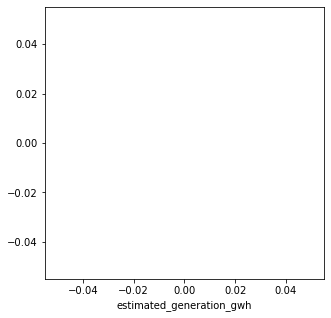

In [27]:
plt.figure(figsize=(5,5))
sns.distplot(df.estimated_generation_gwh,color="red",kde=True)

In [28]:
df['estimated_generation_gwh'].unique()

array([nan])

estimated_generation_gwh has only nan values so I'm going to drop it

the feature has only one value other_fuel3,wepp_id,year_of_capacity_data,estimated_generation_gwh

Handling missing values in string data

In [29]:
data=['other_fuel1','other_fuel2','owner','geolocation_source','generation_data_source']
for i in data:
    print( df_new[i].unique())


[nan 'Oil' 'Cogeneration' 'Gas']
[nan 'Oil']
['Solar Paces' 'Ultratech Cement ltd' 'AES' nan 'Hindustan Pvt lt'
 'Dr Ssk ltd' 'Ashok Ssk ltd' 'Shree Sugars ltd'
 'Ener-t International Ltd.' 'Nav Bharat Buildcon Private Limited'
 'MEIL Green Power Limited' 'Madras Cement Limited'
 'DDE Renewable Energy Private Limited (DREPL)'
 'Electromech Maritech Private Limited'
 'Finehope Allied Engineering Private Limited'
 'Khaya Solar Projects Private Limited' 'Newton Solar Private Limited'
 'Saidham Overseas Private Limited' 'Vasavi Solar Power Private Limited'
 'Indian Power ltd' 'Ballarpur Industries ltd' 'Jk Cement ltd'
 'India Ltd icl)' 'Bharat Petroleum Corporation Limited'
 'Bhilwara Energy Limited' 'Ideal Projects ltd' 'Ugar Works ltd'
 'Vishwanath Sugars ltd' 'Hothur Pvt ltd' 'Janki Corp ltd'
 'Mysore Mills ltd' 'Sunflag Co ltd' 'Varam Pvt ltd' 'Sangam Spinners ltd'
 'Bharat Refinery ltd' 'Binani Industries ltd' 'Indo Synthetics ltd'
 'Dr Babasaheb Ambedkar SSK Limited' 'AEW Infratech P

In [30]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

the other fuel 2 has only one value so I'm going to drop this feature

In [31]:
df_new.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [32]:
data1=['other_fuel1','owner','geolocation_source','generation_data_source']

In [33]:
df[data1]

,other_fuel1,owner,geolocation_source,generation_data_source
0,NaN,Solar Paces,National Renewable Energy Laboratory,NaN
1,NaN,Ultratech Cement ltd,WRI,NaN
2,NaN,AES,WRI,NaN
3,NaN,NaN,WRI,Central Electricity Authority
4,Oil,NaN,WRI,Central Electricity Authority
...,...,...,...,...
903,Oil,NaN,WRI,Central Electricity Authority
904,NaN,Karnataka Power Corporation Limited,Industry About,NaN
905,NaN,NaN,WRI,NaN
906,NaN,Hindustan Zinc ltd,WRI,NaN


In [34]:
for i in data1:
    df_new[i]=df_new[i].fillna(df_new[i].mode().iloc[0])

In [35]:
df_new.isnull().sum()


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                 907
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

FEATURE ENGINEERING

In [36]:
DATA_DROP=['country','country_long','other_fuel2','other_fuel3','wepp_id','year_of_capacity_data','estimated_generation_gwh']

In [37]:
data_mod=df_new

In [38]:
data_mod=df_new.drop(DATA_DROP,axis=1)

In [39]:
data_mod.head(5)

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2000.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2000.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,797.063475,805.760000,701.02725,716.728350,807.601700,Central Electricity Authority
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.74700,886.004428,663.774500,Central Electricity Authority
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,Central Electricity Authority


In [41]:
data_mod['name'].value_counts()

BP Brahmanvel Wind Farm       1
PORINGALKUTTU L               1
Jafrabad Solar Power Plant    1
ALMATTI DAM                   1
KORBA-EAST                    1
                             ..
SIIL Jaibhim Wind Farm        1
BAGLIHAR HEP                  1
OBRA-A                        1
E.G. CANAL                    1
TORANGALLU EXT                1
Name: name, Length: 908, dtype: int64

In [42]:
data_mod['gppd_idnr'].value_counts()

IND0000255    1
WRI1026161    1
WRI1026348    1
IND0000128    1
IND0000040    1
             ..
IND0000404    1
IND0000315    1
WRI1026676    1
IND0000333    1
IND0000032    1
Name: gppd_idnr, Length: 908, dtype: int64

In [43]:
data_mod['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [44]:
data_mod['other_fuel1'].value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [45]:
data_mod['commissioning_year'].value_counts()

2000.0    396
2013.0     28
2015.0     26
2012.0     23
2016.0     21
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [46]:
data_mod['owner'].value_counts()

Acc Acc ltd                                  570
Jk Cement ltd                                  4
Sterling Agro Industries ltd.                  4
Tata Power Solar Systems Limited (TPREL)       3
Karnataka Power Corporation Limited            3
                                            ... 
Hindustan Pvt lt                               1
Shree Saibaba Green Power Private Limited      1
Suryauday Solaire Prakash Private Limited      1
Bindu Vau Urja Private Limited                 1
Manikghar Cement co                            1
Name: owner, Length: 280, dtype: int64

In [47]:
data_mod['source'].value_counts()

Central Electricity Authority                520
CDM                                          124
Lancosola                                     10
National Renewable Energy Laboratory           8
National Thermal Power Corporation (NTPC)      6
                                            ... 
West Coast Paper Mills Ltd.                    1
Aravali Infrapower Private Limited (AIPL)      1
ACME Cleantech Solutions Private Limited       1
Dhariwal Pvt ltd                               1
EMC Limited                                    1
Name: source, Length: 191, dtype: int64

In [48]:
data_mod['url'].value_counts()

http://www.cea.nic.in/                                                              520
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/DNV-CUK1174563974.61/view                          1
http://www.mnre.gov.in                                                                1
https://cdm.unfccc.int/Projects/DB/RWTUV1288029478.94/view                            1
http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254                   1
http://www.abelloncleanenergy.com                                                     1
Name: url, Length: 304, dtype: i

In [49]:
data_mod['generation_gwh_2013'].value_counts()

797.063475     524
0.000000        21
225.964500       1
6492.000000      1
42.496450        1
              ... 
265.754550       1
7229.330000      1
657.217400       1
507.897750       1
8211.000000      1
Name: generation_gwh_2013, Length: 365, dtype: int64

In [128]:
data_mod['generation_gwh_2014'].value_counts()

805.76000     508
0.00000        28
6803.31250      1
4735.13000      1
145.81400       1
             ... 
6224.00000      1
268.48085       1
1255.73200      1
164.32425       1
1153.65300      1
Name: generation_gwh_2014, Length: 374, dtype: int64

In [57]:
data_mod['generation_gwh_2015'].value_counts()

701.02725     484
0.00000        28
462.95360       1
174.17475       1
1297.97750      1
             ... 
118.34530       1
2636.86400      1
665.19730       1
1516.36010      1
7130.50700      1
Name: generation_gwh_2015, Length: 398, dtype: int64

In [58]:
data_mod['generation_gwh_2016'].value_counts()

716.72835     472
0.00000        31
8470.57000      2
1511.00000      2
168.58285       1
             ... 
433.84800       1
283.74811       1
259.94375       1
403.96000       1
307.87290       1
Name: generation_gwh_2016, Length: 405, dtype: int64

In [59]:
data_mod['generation_gwh_2017'].value_counts()

807.60170     466
0.00000        33
170.08530       2
2851.19100      1
9271.00000      1
             ... 
214.48220       1
272.73945       1
2887.00000      1
12.73600        1
158.73235       1
Name: generation_gwh_2017, Length: 410, dtype: int64

In [60]:
data_mod['generation_data_source'].value_counts()

Central Electricity Authority    908
Name: generation_data_source, dtype: int64

In [50]:
col=['name','gppd_idnr','generation_data_source']

In [51]:
data_mod=data_mod.drop(col,axis=1)

In [52]:
data_mod.shape

(908, 15)

the columnsz which has unique value  are dropped

In [352]:
data_mod.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

<Figure size 2160x2160 with 0 Axes>

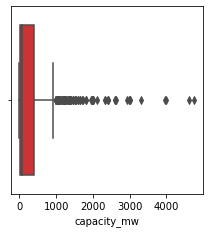

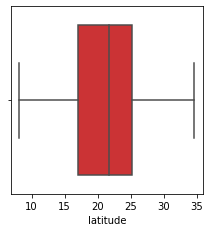

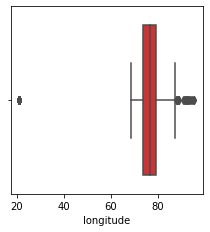

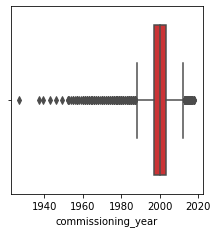

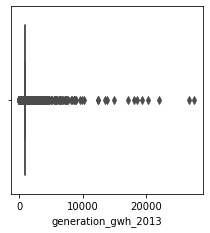

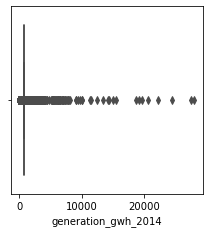

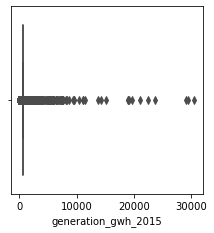

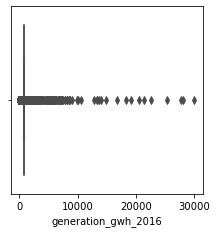

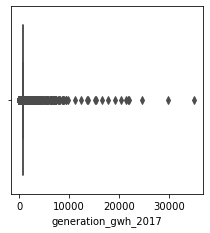

In [53]:
cols=['capacity_mw', 'latitude', 'longitude',
       'commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']
ncol=5
nrows=5
plt.figure(figsize=(30,30))
for i in range(0,9):
    plt.figure(figsize=(20,20))
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(x=cols[i],data=data_mod,palette="Set1")

___Handling outliers in float datas

In [122]:
data_clean=data_mod

In [123]:
for i in cols:
    z = np.abs(zscore(data_mod[i]))
print(np.where(z > 3))

(array([ 15, 144, 210, 309, 365, 494, 495, 649, 658, 696, 722, 725, 727,
       787, 809, 881], dtype=int64),)


In [124]:
data_clean = data_mod[(z<3)]

In [125]:
data_clean.shape

(892, 15)

In [126]:
((908-892)/908)*100

1.762114537444934

1.76% data loss so removing outliers using zscore

In [68]:
Q1=data_mod.quantile(0.25)
Q3=data_mod.quantile(0.75)
IQR=Q3-Q1
data_clean1=data_mod[~((data_mod<(Q1-1.5*IQR))| (data_mod>(Q1+1.5*IQR))).any(axis=1)]

In [69]:
data_clean1.shape

(370, 15)

60%data loss

Handling_skewness

In [127]:
cols=['capacity_mw', 'latitude', 'longitude',
       'commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']
df_clean=data_clean
for i in range(0,9):
    print(cols[i],"=",data_clean[cols[i]].skew())

capacity_mw = 2.1705076772998484
latitude = -0.15102858155345364
longitude = -3.1728181672340097
commissioning_year = -1.6467697184892278
generation_gwh_2013 = 3.3772023891298466
generation_gwh_2014 = 3.1552445441044608
generation_gwh_2015 = 2.867947659039632
generation_gwh_2016 = 2.7614224831185297
generation_gwh_2017 = 2.620822217219757


In [136]:
from sklearn.preprocessing import power_transform
cols=['capacity_mw', 'longitude',
       'commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017']
df_clean[cols]=power_transform (data_clean[cols])


In [138]:
cols=['capacity_mw', 'latitude', 'longitude',
       'commissioning_year','generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017']
for i in range(0,9):
    print(cols[i],"=",data_clean[cols[i]].skew())

capacity_mw = 0.015940673989977668
latitude = -0.15102858155345364
longitude = -0.013544658855035517
commissioning_year = -0.4246382746491607
generation_gwh_2013 = 0.28189290323962074
generation_gwh_2014 = 0.23752116219579592
generation_gwh_2015 = 0.17113864605993268
generation_gwh_2016 = 0.1521659426692913
generation_gwh_2017 = 0.13114332417994823


skewness is removed using power transformation

In [144]:
df_clean.shape

(892, 15)

After removing outliers and skewness the data loss is 1.76%

In [167]:
df_clean.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [168]:
df_clean.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

LABEL ENCODING:
    Encoding all categorical coloumn into numerical column using label encoding technique

In [404]:
data_new=df_clean
col_encod=['primary_fuel', 'other_fuel1','owner', 'source', 'url', 'geolocation_source']

In [405]:
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_new[col]= label.fit_transform(df_clean[col])

In [406]:
data_new.head(5)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.690094,28.1839,-0.461213,6,2,1.172896,229,109,128,1,-0.027255,-0.027818,-0.039841,-0.040556,-0.022676
1,0.225468,24.7663,-0.290015,1,2,0.016119,258,174,173,2,-0.027255,-0.027818,-0.039841,-0.040556,-0.022676
2,-0.273761,21.9038,-0.898028,7,2,0.016119,2,21,205,2,-0.027255,-0.027818,-0.039841,-0.040556,-0.022676
3,0.398418,23.8712,2.652554,2,2,0.403485,5,22,58,2,-0.239392,-0.255563,0.113476,0.131996,-0.175167
4,1.750527,21.9603,0.871374,1,2,1.671044,5,22,58,2,0.745658,1.409318,2.260512,2.250551,1.961041


<AxesSubplot:>

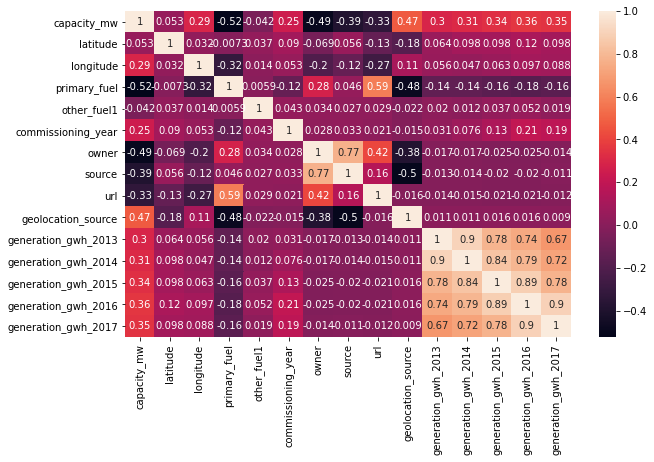

In [371]:
correlation=data_new.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True)

the target column primary fuel is highly correlated with url

__MODELLING

target column=primary_fuel

In [372]:
x1=data_new.drop('primary_fuel',axis=1)
y1=data_new['primary_fuel']

___Handling class imbalance

In [354]:
!pip install imbalanced-learn

In [373]:
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
os=SMOTE()

In [374]:
x1,y1=os.fit_resample(x1,y1)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

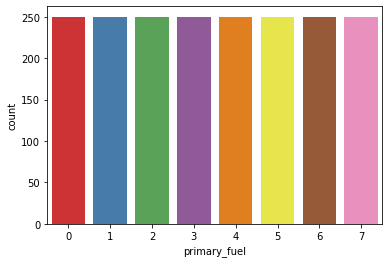

In [375]:
sns.countplot(y1,palette="Set1")

_feature scaling transforming un scaled data into scaled data using min max scalining technique

In [376]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

In [377]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
x=scaled
y=y1

In [378]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

models=[RandomForestClassifier(),BaggingClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
scorelist=[]
acclist=[]

In [379]:
        
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=m.score(xtest,ytest)
    result = confusion_matrix(ytest,p)
    result1 = classification_report(ytest,p)
    result2 = accuracy_score(ytest,p)
    scorelist.append(score)
    acclist.append(result2)
    
    
    print(m,"\n")
    
    print('Accuracy score:',score,"\n")
    print('"Confusion Matrix:\n"',result)
    print('classification_report\n',result1)
    print('Average accuracy_score',result2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

print('Maximun accuracy Score is shown by',models[acclist.index(max(acclist))],max(acclist))

RandomForestClassifier() 

Accuracy score: 0.942 

"Confusion Matrix:
" [[71  1  0  0  0  0  0  0]
 [ 0 47  4  4  5  1  0  0]
 [ 1  0 54  1  1  3  0  0]
 [ 0  4  1 61  0  0  0  0]
 [ 0  1  0  0 55  0  0  0]
 [ 0  1  0  1  0 64  0  0]
 [ 0  0  0  0  0  0 60  0]
 [ 0  0  0  0  0  0  0 59]]
classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.87      0.77      0.82        61
           2       0.92      0.90      0.91        60
           3       0.91      0.92      0.92        66
           4       0.90      0.98      0.94        56
           5       0.94      0.97      0.96        66
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        59

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500

Average accuracy_score 0.942
--------

___CROSS VALIDATION

In [380]:
scorel=[]

In [381]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x,y,cv=5)
scorel.append(scores)
scores

array([0.91  , 0.925 , 0.93  , 0.9325, 0.9325])

In [382]:
bg=BaggingClassifier()
scores=cross_val_score(bg,x,y,cv=5)
scorel.append(scores)
scores

array([0.8825, 0.9125, 0.9   , 0.905 , 0.9025])

In [383]:
kn=KNeighborsClassifier()
scores=cross_val_score(kn,x,y,cv=5)
scorel.append(scores)
scores

array([0.8675, 0.8675, 0.9   , 0.905 , 0.8825])

In [384]:
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,x,y,cv=5)
scorel.append(scores)
scores

array([0.895 , 0.905 , 0.94  , 0.925 , 0.9225])

In [385]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x,y,cv=5)
scorel.append(scores)
scores

array([0.8475, 0.88  , 0.9075, 0.905 , 0.8525])

___Difference of predicted model and crossvalidation score

In [386]:
models=[RandomForestClassifier(),BaggingClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
for i in range(0,5):
    print(models[i],"difference is",scorel[i]-acclist[i])

RandomForestClassifier() difference is [-0.032  -0.017  -0.012  -0.0095 -0.0095]
BaggingClassifier() difference is [-0.0075  0.0225  0.01    0.015   0.0125]
KNeighborsClassifier() difference is [-0.0045 -0.0045  0.028   0.033   0.0105]
GradientBoostingClassifier() difference is [-0.037  -0.027   0.008  -0.007  -0.0095]
DecisionTreeClassifier() difference is [-0.0265  0.006   0.0335  0.031  -0.0215]


RandomforestClassifier() has the least difference

In [394]:
x=scaled
y=y1
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)

In [398]:
from sklearn.model_selection import GridSearchCV,KFold
params = {
    'max_features': ['auto', 'sqrt','log2'],
    'n_estimators': [10, 100, 200, 500],
    'bootstrap':[True],
    'max_depth': [1, 23, 45],
 'min_samples_split': [5, 10],
}

gs2 = GridSearchCV(RandomForestClassifier(), params, verbose = 1)
gs2.fit(xtrain, ytrain)
print('Best param:', gs2.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best param: {'bootstrap': True, 'max_depth': 45, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 500}


In [389]:
x=scaled
y=y1

In [399]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25,random_state=7)
model =RandomForestClassifier(bootstrap=True,max_depth=45,max_features='auto',min_samples_split=5,n_estimators=500)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.924

In [400]:
y_pred_1 = model.predict(x_test)

In [401]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[65  1  0  0  0  0  0  0]
 [ 8 41  7  1  7  1  0  0]
 [ 1  3 50  0  0  2  0  0]
 [ 0  1  4 55  0  2  0  0]
 [ 0  0  0  0 65  0  0  0]
 [ 0  0  0  0  0 56  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        66
           1       0.89      0.63      0.74        65
           2       0.82      0.89      0.85        56
           3       0.98      0.89      0.93        62
           4       0.90      1.00      0.95        65
           5       0.92      1.00      0.96        56
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        57

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500

Accuracy: 0.924


In [ ]:
After hyper tuning
the accuracy for predicting primary fuel is  92.4% 

In [ ]:
Modelling
target column is capacity_mw

In [283]:
x2=data_new.drop('capacity_mw',axis=1)
y2=data_new['capacity_mw']

In [288]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled1 = scaler.fit_transform(x2)

In [289]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [290]:
x=scaled1
y=y2

In [291]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
maelist=[]
mselist=[]
rmselist=[]
r2list=[]

In [292]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    
    mae=mean_absolute_error(p,ytest)
    mse=mean_squared_error(p,ytest)
    rmse=np.sqrt(mean_squared_error(p,ytest))
    r2=r2_score(ytest,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print(m)
    
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)
print('Minimum Mean Absolute error is shown by ',models[maelist.index(min(maelist))],min(maelist))
print('Minimum Mean squared error is shown by ',models[mselist.index(min(mselist))],min(mselist))
print('Minimum Root Mean squared error is shown by ',models[rmselist.index(min(rmselist))],min(rmselist))
print('Maximun R2 Score is shown by ',models[r2list.index(max(r2list))],max(r2list))

KNeighborsRegressor()
Mean absolute error 0.3906578227228139
Mean squared error 0.29081293727500973
Root Mean squared error 0.539270745799371
R2 Score 0.6944445526504748
---------------------------------------------------------------------------------------------------------
SVR()
Mean absolute error 0.43433449670746127
Mean squared error 0.3513496654849728
Root Mean squared error 0.5927475562876433
R2 Score 0.6308389674155245
---------------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Mean absolute error 0.3577826302654984
Mean squared error 0.2877953346313707
Root Mean squared error 0.5364655950118057
R2 Score 0.6976151300475466
---------------------------------------------------------------------------------------------------------
LinearRegression()
Mean absolute error 0.5665328148711406
Mean squared error 0.5251562866230793
Root Mean squared error 0.7246766773003526
R2 Score 0.4482213700974865
------------------

Cross Validation

In [293]:
scorel=[]

In [407]:
from sklearn.utils import shuffle
x=scaled1
y=y2


In [295]:
from sklearn.model_selection import cross_val_score
k=KNeighborsRegressor()
scores=cross_val_score(k,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.65883587, 0.64956796, 0.69233958, 0.68427117, 0.65190872])

In [296]:
from sklearn.model_selection import cross_val_score
svr=SVR()
scores=cross_val_score(svr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.67078805, 0.67828948, 0.69101081, 0.69941473, 0.59641298])

In [297]:
from sklearn.model_selection import cross_val_score
dt=DecisionTreeRegressor()
scores=cross_val_score(dt,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.60440933, 0.60233227, 0.61012061, 0.65197778, 0.69254916])

In [298]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
scores=cross_val_score(lr,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.54343294, 0.5704136 , 0.55191167, 0.53081194, 0.54252536])

In [299]:
from sklearn.model_selection import cross_val_score
l=Lasso()
scores=cross_val_score(l,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([-8.08546647e-07, -1.56747415e-04, -3.88947378e-04, -1.39131366e-02,
       -1.03272258e-02])

In [300]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor()
scores=cross_val_score(rf,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.74143651, 0.77141384, 0.77317409, 0.82424649, 0.7987861 ])

In [301]:
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
scores=cross_val_score(gb,x,y,scoring='r2',cv=5)
scorel.append(scores)
scores

array([0.76904589, 0.78282679, 0.78956492, 0.82561934, 0.79809862])

___Difference of predicted model and crossvalidation score

In [302]:
models=[KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),LinearRegression(),Lasso(),
        RandomForestRegressor(),GradientBoostingRegressor()]
for i in range(0,7):
    print(models[i],"difference is",scorel[i]-r2list[i])

KNeighborsRegressor() difference is [-0.03560868 -0.04487659 -0.00210497 -0.01017338 -0.04253584]
SVR() difference is [ 0.03994908  0.04745051  0.06017185  0.06857577 -0.03442599]
DecisionTreeRegressor() difference is [-0.0932058  -0.09528286 -0.08749452 -0.04563735 -0.00506597]
LinearRegression() difference is [0.09521157 0.12219223 0.1036903  0.08259057 0.09430399]
Lasso() difference is [ 1.98794222e-04  4.28553538e-05 -1.89344609e-04 -1.37135338e-02
 -1.01276230e-02]
RandomForestRegressor() difference is [-0.06212013 -0.03214279 -0.03038255  0.02068986 -0.00477054]
GradientBoostingRegressor() difference is [-0.01690193 -0.00312103  0.0036171   0.03967152  0.01215081]


Randomforest regressor has least difference

In [408]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_features': ['auto', 'sqrt','log2'],
    'n_estimators': [10, 100, 200, 500],
    'bootstrap':[True],'criterion':['mse','mae']
}
grid = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 5, scoring = "r2")



In [409]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'bootstrap': True, 'criterion': 'mse', 'max_features': 'log2', 'n_estimators': 500}


___MODELING USING BEST PARAMETERS

In [ ]:
x=scaled1
y=y2

In [314]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=7)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
model1=RandomForestRegressor(n_estimators=100,max_features='sqrt',bootstrap=True,criterion='mse')
model1.fit(xtrain,ytrain)
p=model1.predict(xtest)
acc=model1.score(xtest,ytest)
mae=mean_absolute_error(p,ytest)
mse=mean_squared_error(p,ytest)
rmse=np.sqrt(mean_squared_error(p,ytest))
r2=r2_score(ytest,p)
print('Accuracy',(round(acc,2))*100)
print('Mean absolute error',mae)
print('Mean squared error',mse)
print('Root Mean squared error',rmse)
print('r2 score',round(r2,2))
     

Accuracy 82.0
Mean absolute error 0.29433429711327025
Mean squared error 0.1748576943453419
Root Mean squared error 0.4181598908854625
r2 score 0.82


Bestmodel:Randomforest regressor

Best_parameters {'bootstrap': True, 'criterion': 'mse', 'max_features': 'sqrt', 'n_estimators': 100}

Accuracy=82%

Mean absolute error 0.2939701302906809
Mean squared error 0.1748576943453419
Root Mean squared error 0.4181598908854625

Target=primary_fuel

Bestmodel:Randomforest classifier

Best_parameters {'bootstrap': True, 'max_depth': 45, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 500}
onfusion Matrix:
[[65  1  0  0  0  0  0  0]
 [ 8 41  7  1  7  1  0  0]
 [ 1  3 50  0  0  2  0  0]
 [ 0  1  4 55  0  2  0  0]
 [ 0  0  0  0 65  0  0  0]
 [ 0  0  0  0  0 56  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        66
           1       0.89      0.63      0.74        65
           2       0.82      0.89      0.85        56
           3       0.98      0.89      0.93        62
           4       0.90      1.00      0.95        65
           5       0.92      1.00      0.96        56
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        57

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.93      0.92      0.92       500

Accuracy: 0.924

In [402]:
from joblib import dump
dump(model, 'model_global_power.joblib')


['model_global_power.joblib']

In [403]:
from joblib import dump
dump(model1, 'model_global_power_plant.joblib')

['model_global_power_plant.joblib']

In [1]:
from joblib import load
loaded = load('model_global_power.joblib')